In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

In [38]:
dataset = pd.read_csv("../Datasets/Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [39]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [40]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_scaled = sc_x.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

In [41]:
regression = SVR(kernel="rbf").fit(x_scaled, y_scaled)
y_pred = sc_y.inverse_transform(regression.predict(x_scaled).reshape(-1,1))

In [50]:
dataset.Salary.std()

299373.88366760087

: 

In [48]:
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("MSA:", mean_absolute_error(y, y_pred))
print("R2:", r2_score(y, y_pred))

RMSE: 141550.3241399742
MSA: 63332.392089689674
R2: 0.7516001070620797


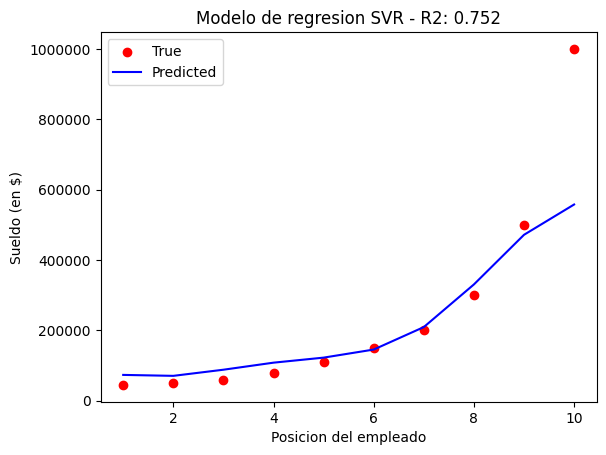

In [46]:
plt.scatter(X, y, color='red', label='True')
plt.plot(X, y_pred, color='blue', label='Predicted')
plt.title("Modelo de regresion SVR - R2: {}".format(round(r2_score(y, y_pred), 3)))
plt.xlabel("Posicion del empleado")
plt.ylabel("Sueldo (en $)")
plt.gca().ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()

In [43]:
def predict_multiple_values(model, sc_x, sc_y, values):
    scaled_values = sc_x.transform(np.array(values).reshape(-1, 1))
    scaled_predictions = model.predict(scaled_values)
    predictions = sc_y.inverse_transform(scaled_predictions.reshape(-1, 1)).flatten()
    return predictions

values_to_predict = [0, 2, 3.3, 5, 6, 6.5, 10]
predicted_values = predict_multiple_values(regression, sc_x, sc_y, values_to_predict)
for value, prediction in zip(values_to_predict, predicted_values):
    print("Predicción para {}: ${}".format(value, prediction))

Predicción para 0: $104457.48919402083
Predicción para 2: $70786.94584625575
Predicción para 3.3: $94667.78860373673
Predicción para 5: $122574.52250598784
Predicción para 6: $145503.1068857161
Predicción para 6.5: $170370.02040650236
Predicción para 10: $557821.7589989661
